In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [2]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
print(torch.__version__)

True
NVIDIA RTX A6000
2.4.0+cu121


/home/gesaloof/miniconda3/envs/contour/lib/python3.12/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# Test prediction and visualization

In [3]:
from embryo_binary_segmentation._data_load import upload_data
from embryo_binary_segmentation._config import TEST_PARAMS
import embryo_binary_segmentation._unet_smaller as unet_smaller
from embryo_binary_segmentation._evaluation import predict_with_images, plot_loss_and_time, visualize_random_pred, iou_pytorch, score_model

/home/gesaloof/code/IO/IO/IO.py:24: UserWarning: KLB library is not installed
  warnings.warn('KLB library is not installed')


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
test_path, binarize, target_size, patch_size, batch_size, load_model_path, load_csv_path = TEST_PARAMS.values()

In [7]:
eval_dataset = upload_data(test_path, 'val', binarize, patch_size, target_size)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False)

/home/gesaloof/data/data_polina/Test_visualization/FUSE
/home/gesaloof/data/data_polina/Test_visualization/SEG


In [8]:
len(eval_dataset)

4

In [9]:
unet_small = unet_smaller.UNet()
unet_small = unet_small.to(device)

## Plot training curves

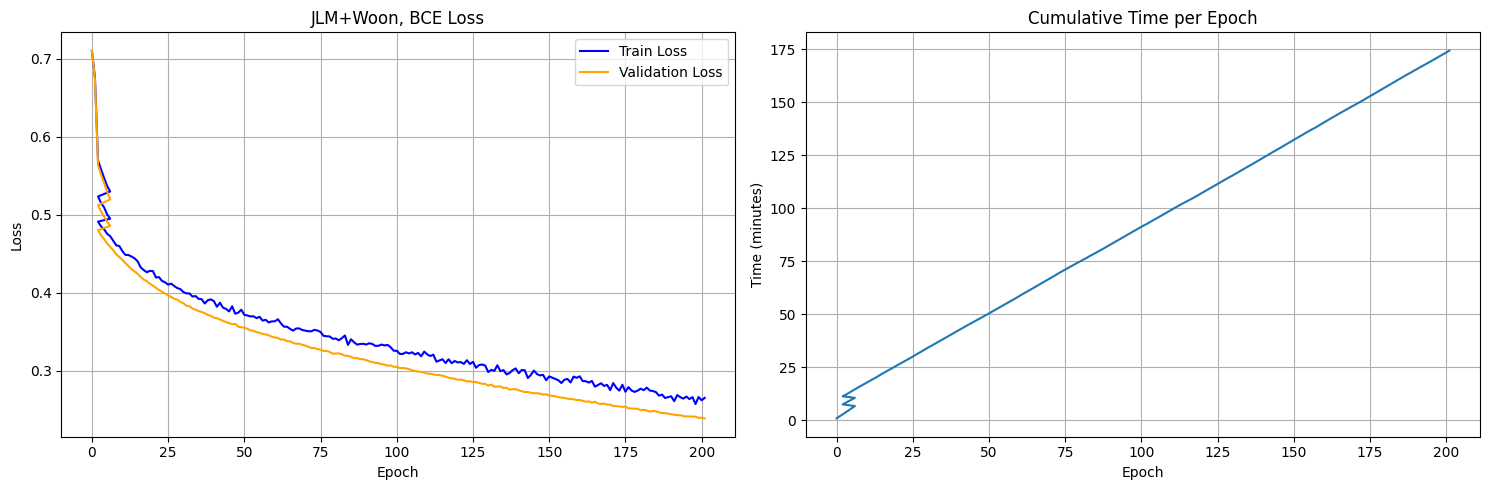

In [10]:
plot_loss_and_time(load_csv_path, 'JLM+Woon, BCE Loss')

In [13]:
plot_loss_and_time??

Signature: plot_loss_and_time(csv_path, title, save_path=None)
Docstring: <no docstring>
Source:   
def plot_loss_and_time(csv_path, title, save_path=None):
    epochs = []
    train_losses = []
    val_losses = []
    times = []

    with open(csv_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            epoch, train_loss, val_loss, time = map(float, row)
            epochs.append(epoch)
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            times.append(time)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='orange')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title(title)
    plt.legend()
    plt.grid(True)

    cumulative_time = [sum(times[:i+1])/60 for i in range(len(times))]
    plt.subplot(1, 2, 2)
    plt.plot(epochs, cumulative_time)
    plt.ylabel('Ti

## Made predictions

In [11]:
predictions, images_batch, masks_batch = predict_with_images(unet_small, eval_loader, load_model_path, device)
score = score_model(unet_small, load_model_path, iou_pytorch, eval_loader, device, threshold_pixel = 0.5)
print("Loaded model score: ", score, '\n')

/home/gesaloof/code/embryo_binary_segmentation/src/embryo_binary_segmentation/_evaluation.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.lo

Loaded model score:  0.802700936794281 



## Visualize random predictions

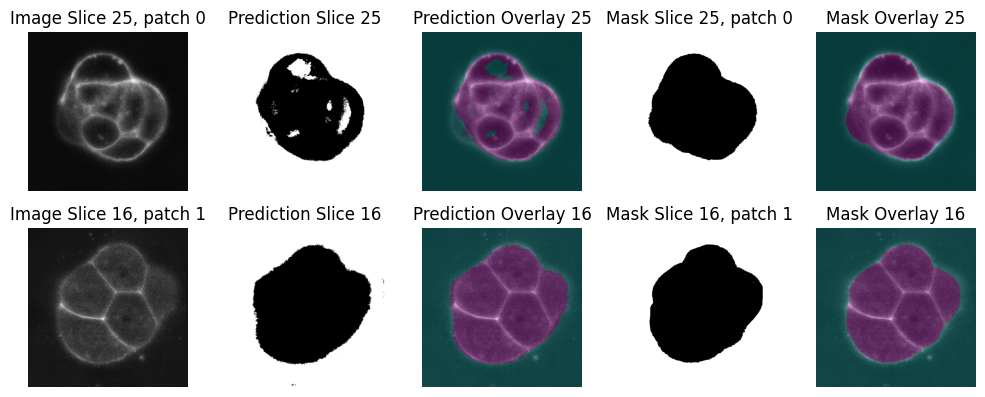

In [12]:
visualize_random_pred(images_batch, masks_batch, predictions, 4, True, threshold=0.5, alpha=0.2)

# Made and Save final predictions

In [2]:
from embryo_binary_segmentation._final_predictions import made_predictions
from embryo_binary_segmentation._config import PRED_PARAMS
import embryo_binary_segmentation._unet_smaller as unet_smaller

/home/polinasoloveva/miniforge3/envs/pytorch-env/lib/python3.10/site-packages/IO/IO.py:24: UserWarning: KLB library is not installed
  warnings.warn('KLB library is not installed')


In [3]:
pred_path, final_load_model_path, batch_size, save_pred_path = PRED_PARAMS.values()

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
unet_small = unet_smaller.UNet()
unet_small = unet_small.to(device)
unet_small.load_state_dict(torch.load(final_load_model_path))

/home/polinasoloveva/miniforge3/envs/pytorch-env/lib/python3.10/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


<All keys matched successfully>

In [5]:
made_predictions(pred_path, unet_small, save_pred_path, batch_size, device)
print(f"Predictions save in {save_pred_path} \n")

/home/polinasoloveva/Data/Val/e7_woon/FUSE_raw_cropped


RuntimeError: NVML_SUCCESS == DriverAPI::get()->nvmlInit_v2_() INTERNAL ASSERT FAILED at "/opt/conda/conda-bld/pytorch_1711403380909/work/c10/cuda/CUDACachingAllocator.cpp":799, please report a bug to PyTorch. 